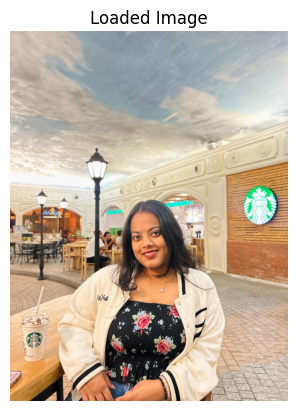

In [22]:
import cv2
import matplotlib.pyplot as plt

# Load image
image_path = "mansi.jpg"
img = cv2.imread(image_path)  # Load image in BGR format

# Convert BGR to RGB 
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display image
plt.imshow(img_rgb)
plt.axis('off')  # Hide axes
plt.title("Loaded Image")
plt.show() 


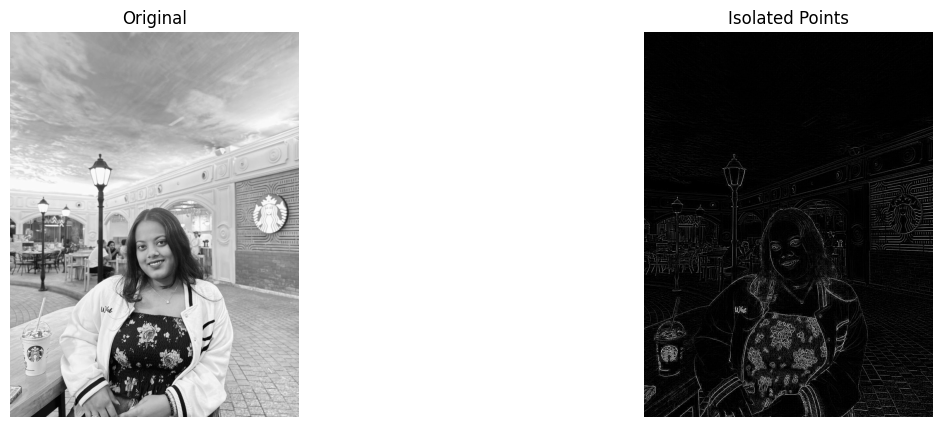

In [16]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the grayscale image
image_path = "mansi.jpg"  
grayscale_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# 1. Function to detect isolated points using a Laplacian filter
def detect_isolated_points(img):
    kernel = np.array([[1, 1, 1], 
                       [1, -8, 1], 
                       [1, 1, 1]])  # Laplacian kernel
    output = cv2.filter2D(img, -1, kernel)
    return output

# Apply the function
isolated_points = detect_isolated_points(grayscale_img)

# Function to plot images
def plot_images(images, titles, cmap='gray'):
    plt.figure(figsize=(15, 5))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i+1)
        plt.imshow(img, cmap=cmap)
        plt.title(title)
        plt.axis('off')
    plt.show()

# Plot original and isolated points image
plot_images([grayscale_img, isolated_points], ["Original", "Isolated Points"]) 


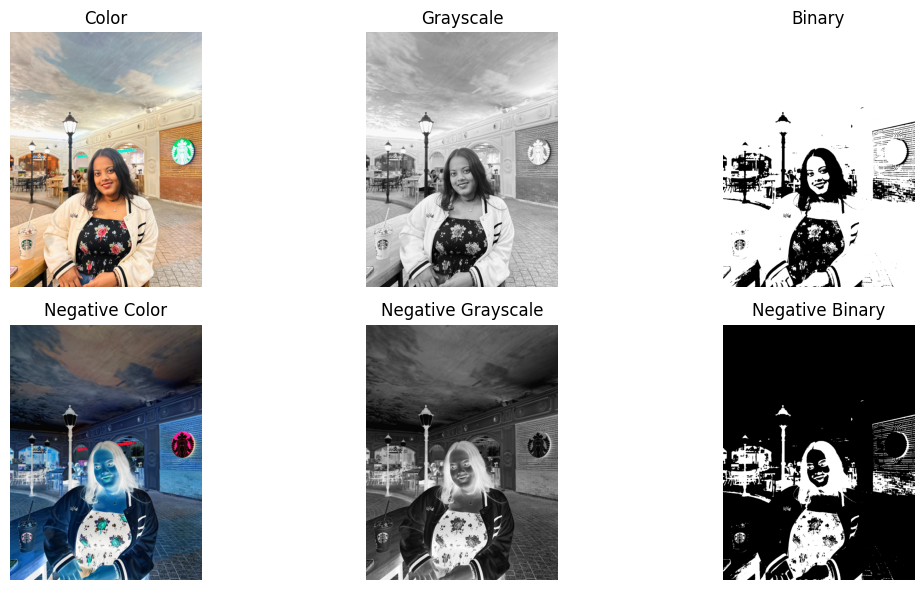

In [15]:
# 2. Image Negative for Gray, Color, and Binary
image_path = "mansi.jpg"
color_img = cv2.imread(image_path)  # BGR format
gray_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)
_, binary_img = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY)

# Negative transformations
color_negative = 255 - color_img
gray_negative  = 255 - gray_img
binary_negative = 255 - binary_img

# Plotting images
images = [color_img, gray_img, binary_img, color_negative, gray_negative, binary_negative]
titles = ["Color", "Grayscale", "Binary", "Negative Color", "Negative Grayscale", "Negative Binary"]

plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    if i in [0, 3]:  # Color images: convert BGR to RGB
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.axis("off")
plt.tight_layout()
plt.show() 

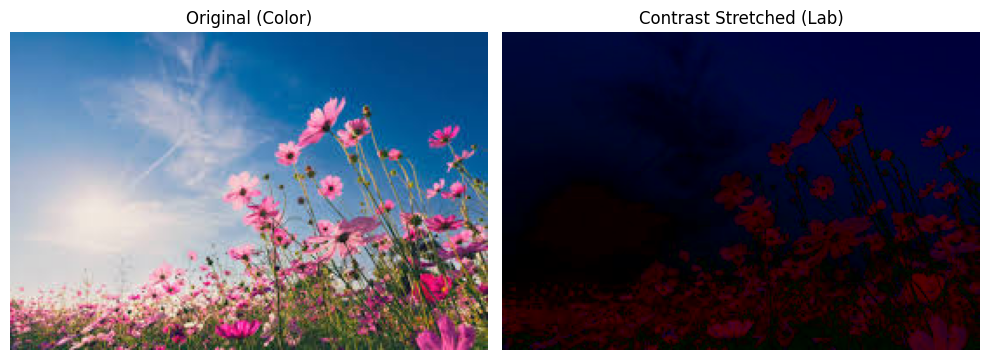

In [28]:
# 3. Contrast Stretching
img_bgr = cv2.imread("images1.jpeg", cv2.IMREAD_COLOR)
lab_img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2LAB)

# Split into L, A, and B channels
L, A, B = cv2.split(lab_img)

# Contrast stretch only the L channel
min_val, max_val = np.min(L), np.max(L)
L_stretched = ((L - min_val) * 255 / (max_val - min_val)).astype(np.uint8)

# Merge the stretched L channel back with the original A and B
lab_stretched = cv2.merge((L_stretched, A, B))
img_stretched_bgr = cv2.cvtColor(lab_stretched, cv2.COLOR_LAB2BGR)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.title("Original (Color)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_stretched_bgr, cv2.COLOR_BGR2RGB))
plt.title("Contrast Stretched (Lab)")
plt.axis('off')

plt.tight_layout()
plt.show() 

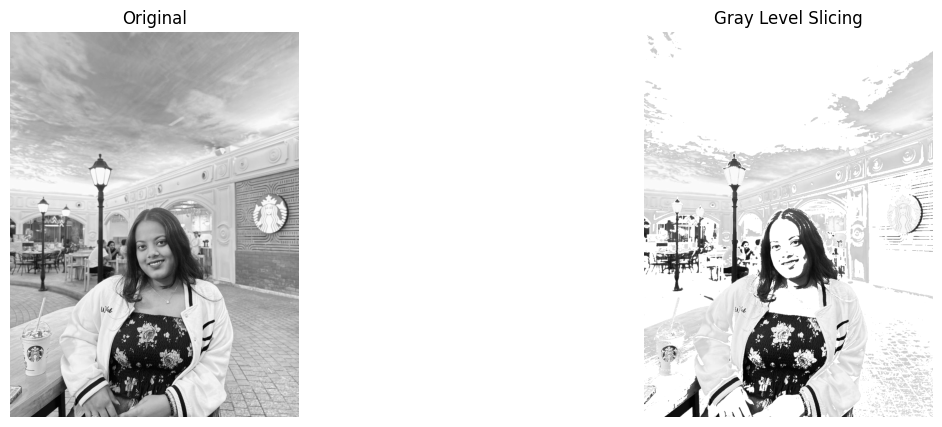

In [32]:
# 4. Gray Level Slicing
def gray_level_slicing(img, min_range, max_range):
    sliced = np.where((img >= min_range) & (img <= max_range), 255, img)
    return np.uint8(sliced)
gray_sliced = gray_level_slicing(grayscale_img, 100, 200) 
plot_images([grayscale_img , gray_sliced], ["Original", "Gray Level Slicing"]) 
# We specify grey level interval and pixels within that range becomes white and those outside becomes black and only pixels in target range are highlighted making them more visible. 
# USE: Feature extraction 

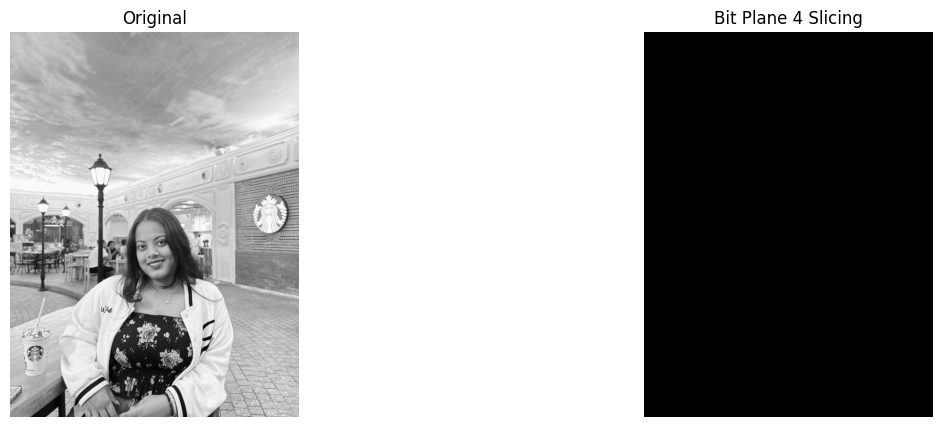

In [35]:
# 5. Bit Plane Slicing
def bit_plane_slicing(img, bit):
    return (img & (1 << bit)) >> bit * 255
bit_plane_4 = bit_plane_slicing(grayscale_img, 4)
plot_images([grayscale_img, bit_plane_4], ["Original", "Bit Plane 4 Slicing"]) 

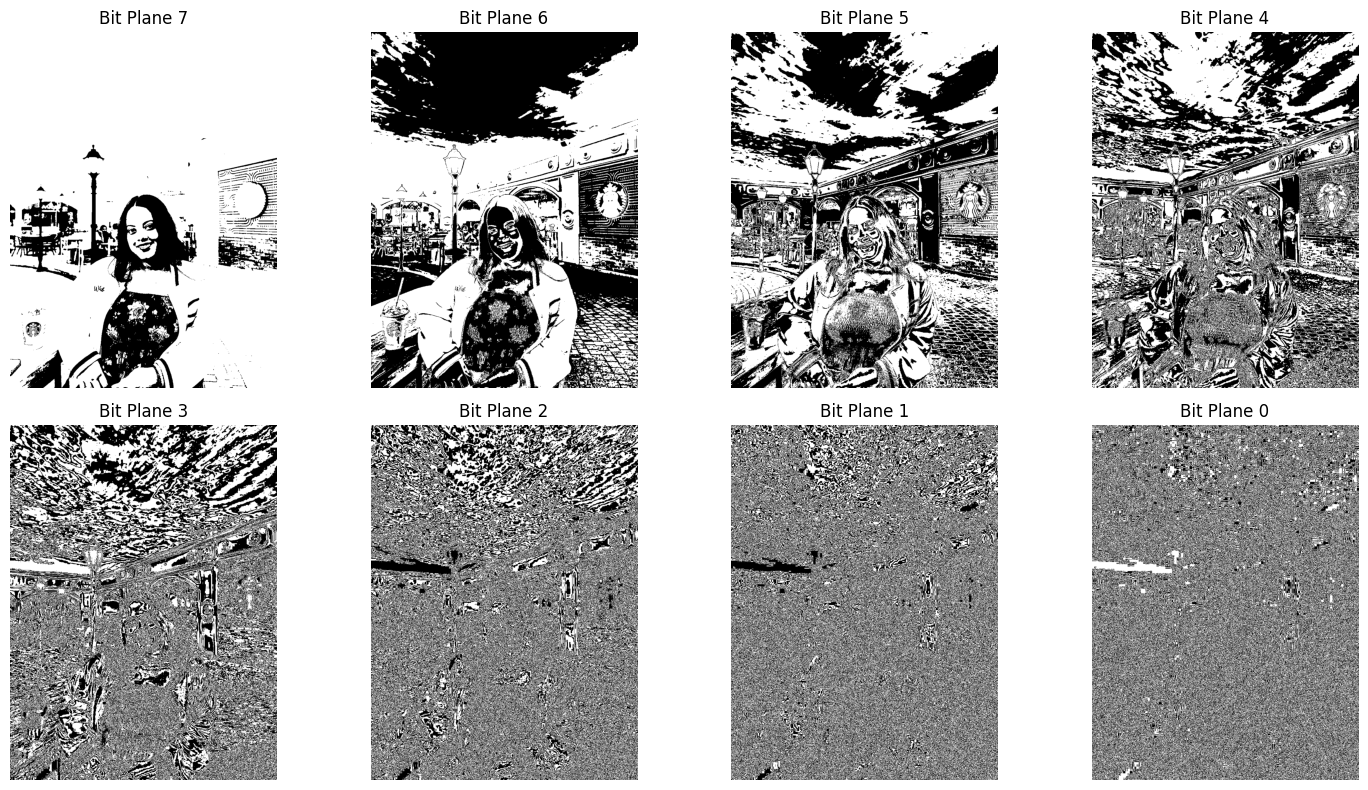

In [39]:
# 5. Bit Plane Slicing
bit_planes = []
for i in range(8):
    bit_plane = ((grayscale_img >> i) & 1) * 255
    bit_planes.append(bit_plane) 

plt.figure(figsize=(15, 8))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(bit_planes[7-i], cmap='gray')
    plt.title(f"Bit Plane {7-i}")
    plt.axis("off")
plt.tight_layout()
plt.show() 


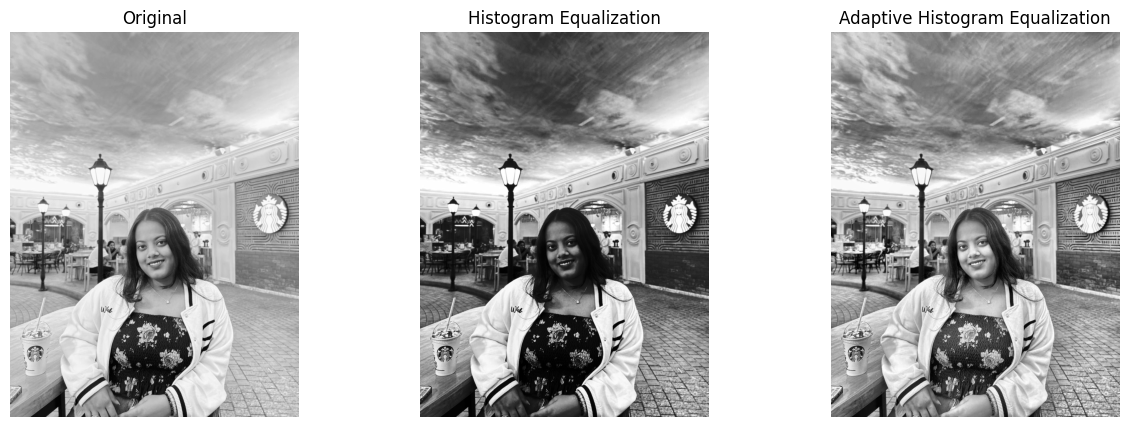

In [40]:
# 6. Histogram Equalization & Adaptive Histogram Equalization 
def histogram_equalization(img):
    return cv2.equalizeHist(img)

def adaptive_histogram_equalization(img):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    return clahe.apply(img) 
hist_eq = histogram_equalization(grayscale_img)
adaptive_hist_eq = adaptive_histogram_equalization(grayscale_img)
plot_images([grayscale_img, hist_eq, adaptive_hist_eq], ["Original", "Histogram Equalization", "Adaptive Histogram Equalization"])

#X-ray, where most pixel values are clustered in the dark range, histogram equalization redistributes these values to enhance details across both dark and bright regions, making the entire image clearer.